In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 소프트맥스 함수 정의
def softmax(z):
    exp_z = np.exp(z) 
    return exp_z / np.sum(exp_z)

In [3]:
# 세 클래스의 로짓 값
logits = np.array([2.0, 1.0, 0.1])
probs = softmax(logits)

print("로짓(Logits)=", logits)
print("소프트맥스 확률=", np.round(probs, 4))
print("소프트맥스 확률 합계=", np.sum(probs))

로짓(Logits)= [2.  1.  0.1]
소프트맥스 확률= [0.659  0.2424 0.0986]
소프트맥스 확률 합계= 1.0


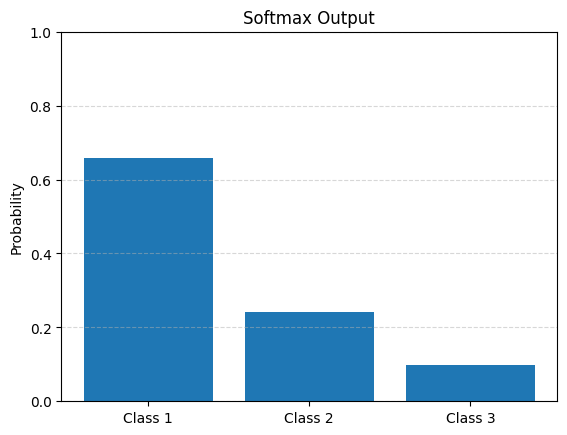

In [4]:
# 시각화
plt.bar(['Class 1', 'Class 2', 'Class 3'], probs)
plt.title('Softmax Output')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

## 다중클래스 분류 실습

In [5]:
from sklearn import datasets
digit_dataset = datasets.load_digits()
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
digit_dataset["images"].shape

(1797, 8, 8)

In [7]:
digit_dataset["target"][0]

np.int64(0)

In [8]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

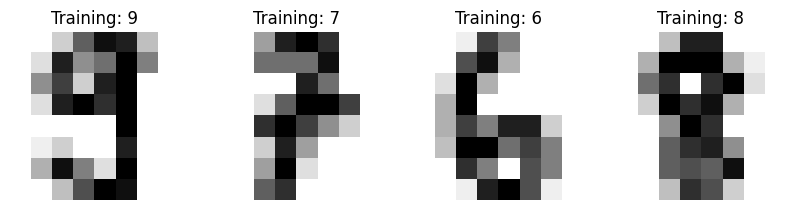

In [9]:
import matplotlib.pyplot as plt
from random import randint
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3)) # (1)

for ax in axes: # (2)
    num = randint(1, 1000) # (3)
    image = digit_dataset["images"][num]
    label = digit_dataset["target"][num] 
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # (4)
    ax.set_title('Training: %i' % label)

In [10]:
from sklearn.model_selection import train_test_split

X = digit_dataset["data"] 
y = digit_dataset["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y) # default = 0.25

In [11]:
X_train.shape

(1347, 64)

### 모델생성

In [12]:
from sklearn.linear_model import LogisticRegression

logreg_softmax = LogisticRegression(solver="sag", multi_class="multinomial", max_iter=1000)
logreg_softmax.fit(X_train, y_train)

C:\Users\USER\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [13]:
X_test.shape

(450, 64)

In [14]:
X_test[1,:].shape

(64,)

In [15]:
y_test[1]

np.int64(3)

In [16]:
print("예측 결과=",logreg_softmax.predict(X_test[1,:].reshape(1, -1)))
print("실제 정답=",y_test[1])

예측 결과= [3]
실제 정답= 3


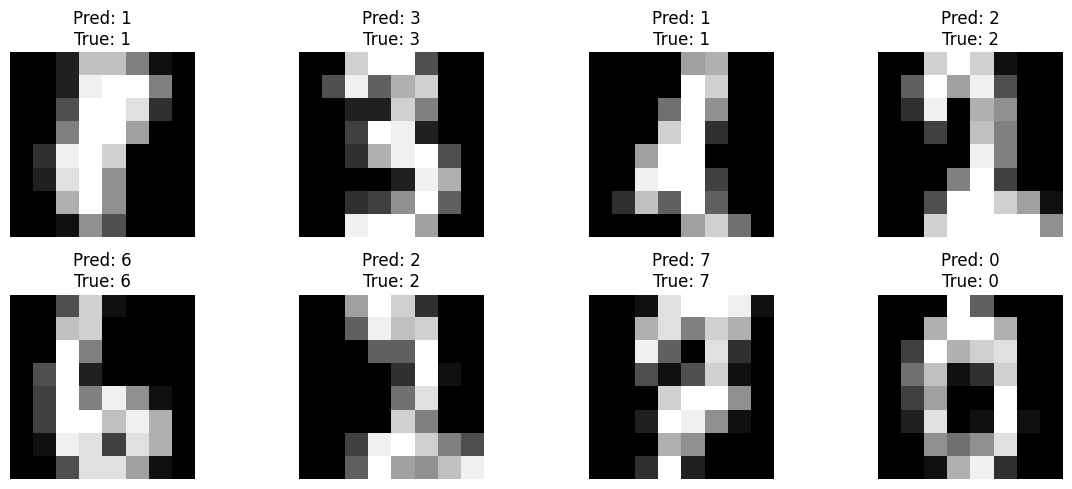

In [17]:
y_pred = logreg_softmax.predict(X_test)

fig, axes = plt.subplots(2, 4, figsize=(12, 5))
axes = axes.ravel()

for i in range(8):
    axes[i].imshow(X_test[i].reshape(8, 8), cmap="gray")
    axes[i].set_title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_softmax.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  1,  0,  0,  0,  1,  1],
       [ 0,  0, 42,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 45,  0,  1,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 35,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  0,  2,  0,  0,  1,  0,  1, 42,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 39]])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.93      0.96        42
           2       0.95      0.98      0.97        43
           3       0.95      0.98      0.97        58
           4       0.98      0.94      0.96        48
           5       0.95      0.95      0.95        37
           6       0.98      0.98      0.98        54
           7       0.95      1.00      0.98        41
           8       0.98      0.91      0.94        46
           9       0.93      0.97      0.95        40

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



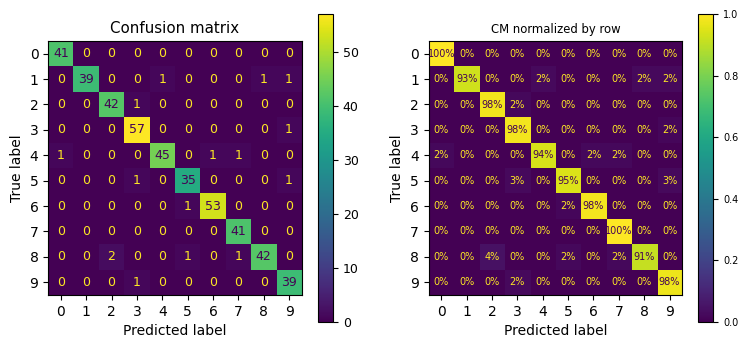

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=7)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

## ROC커브와 AUC

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_test_bin = label_binarize(y_test, classes=np.arange(10))

In [22]:
y_score = logreg_softmax.predict_proba(X_test)

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

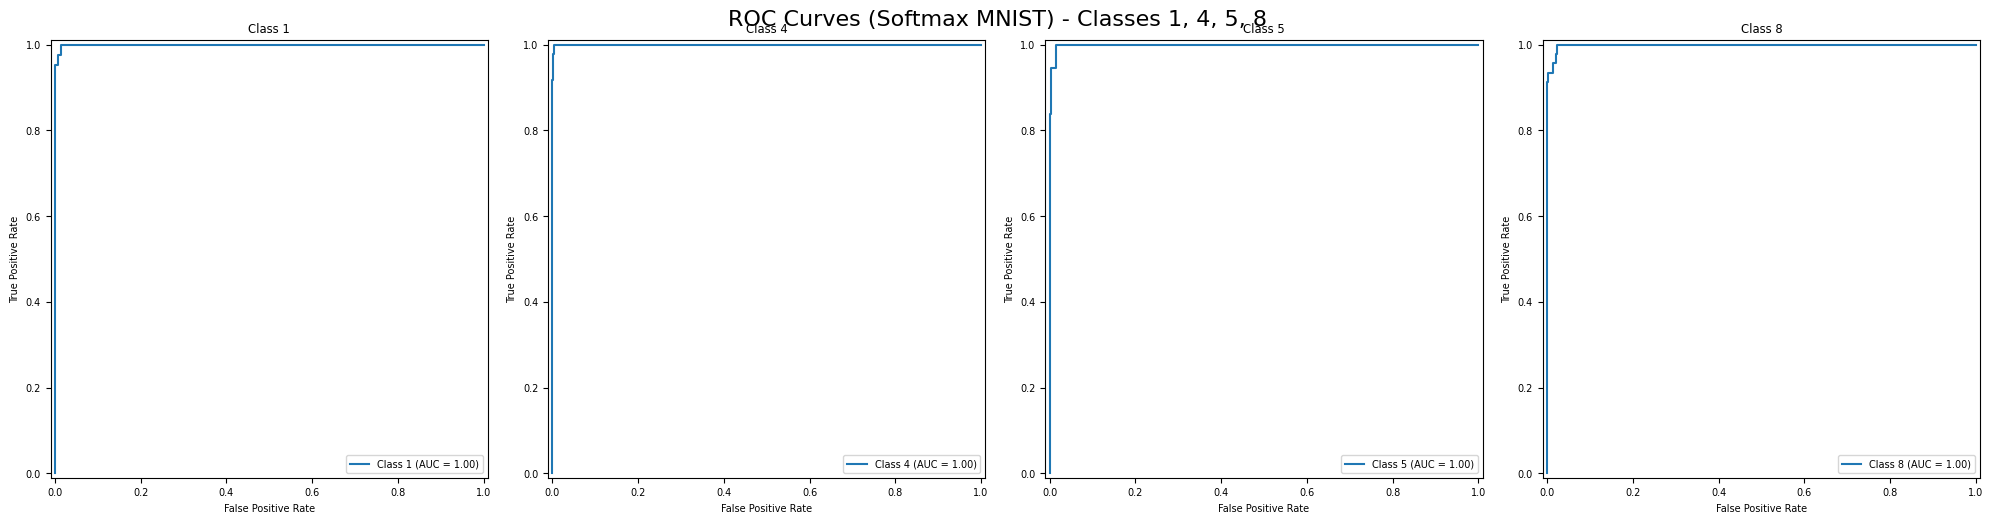

In [24]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))


selected_classes = [1, 4, 5, 8]

for plot_idx, class_idx in enumerate(selected_classes):
    RocCurveDisplay(
        fpr=fpr[class_idx], tpr=tpr[class_idx], roc_auc=roc_auc[class_idx],
        estimator_name=f"Class {class_idx}", 
    ).plot(ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Class {class_idx}")

plt.suptitle("ROC Curves (Softmax MNIST) - Classes 1, 4, 5, 8", fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
print("AUC for Class 1:", roc_auc[1])
print("AUC for Class 4:", roc_auc[4])
print("AUC for Class 5:", roc_auc[5])
print("AUC for Class 8:", roc_auc[8])

AUC for Class 1: 0.9994747899159664
AUC for Class 4: 0.9997408789386402
AUC for Class 5: 0.9989529481054904
AUC for Class 8: 0.9987085665088248
